# ***ML PRACTICAL CHAPTER 2***



* LOAD DATASETS 


In [3]:
import pandas as pd
data=pd.read_csv("student_scores.csv")
data.head(10)


,name,hours,score,gender,grades,class
0,Aarav,8,76,M,A,9A
1,Riya,5,62,F,B,9B
2,Kabir,10,88,M,A,10A
3,Sana,4,55,F,C,9A
4,Vivaan,7,72,M,B,10B
5,Ishita,6,64,F,B,9C
6,Rohan,3,48,M,D,9B
7,Meera,9,90,F,A,11A
8,Aditya,2,38,M,F,9C
9,Kavya,11,93,F,A,12A


In [4]:
print('Columns:', data.columns.tolist())
print('\info:') #display datatypes
print(data.info())
print("\nDescribe:") #display the statistics
display(data.describe())

Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']
\info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Describe:


,hours,score
count,92.000000,92.000000
mean,6.510870,68.836957
std,2.265336,15.692286
min,2.000000,35.000000
25%,5.000000,57.000000
50%,7.000000,70.000000
75%,8.000000,82.000000
max,11.000000,94.000000


In [7]:
print(data.isnull().sum()) #For completeness

#option 1 : Fill the missing value with mean
data["score"]=data["score"].fillna(data["score"].mean())

#option 2: drop the row with missing values
data=data.dropna()


name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64


In [8]:
data.shape  #five stize of  the dataset

(92, 6)

In [11]:
data.dtypes #chaeck datatype consistancy


name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object

**Accuracy**
*showa outliers*

<Axes: >

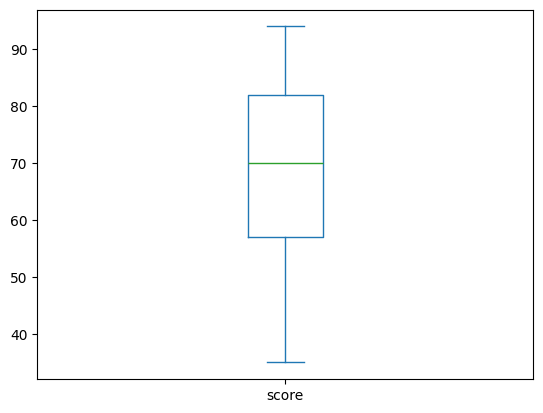

In [21]:
data.describe()
data['score'].plot(kind='box')


In [24]:
data['score'].max() 

94

In [25]:
data['score'].min()

35

In [27]:
data['grades'].value_counts(normalize=True) # Bias Check

grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64

In [31]:
data['grades'].value_counts(normalize=False)

grades
B    33
A    30
C    18
D     8
F     3
Name: count, dtype: int64

In [30]:
data['class'].value_counts(normalize=True)

class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64


#  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_scores.csv` |
| **Description**     | Contains small student score (Completeness, Consistency, Accuracy, Time-Keeping, Bias). |
| **Features**        | `name`, `hours`, `scores`, `gender`, `grades`,`class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | 0 missing value |
| **Transformations** | checked size of datasets, performed value counts, dtype checks, and boxplot analysis for data quality |
| **Owner**           | Taniksha Pawar |
| **Last Updated**    | 2025-12-09 |

# Preprosessing

In [29]:

import pandas as pd
data=pd.read_csv("student_scores.csv")
data.head(10)

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])

print(data.head(20))

       name  hours  score  gender grades class
0     Aarav      8     76       1      A    9A
1      Riya      5     62       0      B    9B
2     Kabir     10     88       1      A   10A
3      Sana      4     55       0      C    9A
4    Vivaan      7     72       1      B   10B
5    Ishita      6     64       0      B    9C
6     Rohan      3     48       1      D    9B
7     Meera      9     90       0      A   11A
8    Aditya      2     38       1      F    9C
9     Kavya     11     93       0      A   12A
10    Naman      5     60       1      B   10A
11   Jhanvi      7     70       0      B   11B
12   Pranav      4     52       1      C    9A
13     Tara      9     85       0      A   12B
14     Yash      6     66       1      B   10C
15    Anaya      8     78       0      A   11A
16    Harsh      3     45       1      D    9A
17     Diya     10     89       0      A   12C
18  Sarthak      6     63       1      B   10B
19    Manya      7     74       0      B   11B


## ***Working on Telecom Dataset***

**Loading the data**

In [20]:
import pandas as pd
df = pd.read_csv("telecom_dataset.csv", parse_dates=['last_call_time','first_recharge_date'])
teledata.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13584\2820417457.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("telecom_dataset.csv", parse_dates=['last_call_time','first_recharge_date'])


,customer_id,region,plan_type,tenure_months,monthly_charges,total_charges,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,days_since_first_recharge,days_since_last_recharge,last_call_time,first_recharge_date,network_issue_flag,data_usage_intensity,days_to_churn_prediction,churn
0,111,Chennai,Postpaid,28,459,17672,3,1,No,5,0.083,No,1728,47,2025-12-09 14:32:00,2020-04-08,Yes,Medium,12,No
1,102,Hyderabad,Basic,11,189,5756,1,0,No,1,0.018,No,1748,6,2025-12-09 09:15:00,2020-03-18,No,Low,67,No
2,101,Chennai,Basic,46,229,17654,2,0,No,3,0.034,No,1475,12,2025-12-09 11:48:00,2020-12-11,Yes,Low,54,No
3,122,Hyderabad,Postpaid,6,389,898,4,4,No,5,0.091,No,113,53,2025-12-09 22:41:00,2021-11-15,No,Medium,5,Yes
4,103,Bangalore,Postpaid,52,429,21496,1,1,No,2,0.020,No,606,8,2025-12-09 08:52:00,2022-05-04,No,Medium,88,No


In [7]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


# **Preprocessing the data**

In [15]:
features = teledata.drop(columns=['churn'])
label = teledata['churn']

print("Feature Columns:")
[print (x) for x in features.columns]
print("\n\nLabel Column:\n",label.name)

Feature Columns:
customer_id
region
plan_type
tenure_months
monthly_charges
total_charges
calls_dropped
support_calls
is_prepaid
complaints_last_30_days
call_drop_ratio
is_ported_out_last_year
days_since_first_recharge
days_since_last_recharge
last_call_time
first_recharge_date
network_issue_flag
data_usage_intensity
days_to_churn_prediction


Label Column:
 churn


In [16]:
teledata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                127 non-null    int64  
 1   region                     127 non-null    object 
 2   plan_type                  127 non-null    object 
 3   tenure_months              127 non-null    int64  
 4   monthly_charges            127 non-null    int64  
 5   total_charges              127 non-null    int64  
 6   calls_dropped              127 non-null    int64  
 7   support_calls              127 non-null    int64  
 8   is_prepaid                 127 non-null    object 
 9   complaints_last_30_days    127 non-null    int64  
 10  call_drop_ratio            127 non-null    float64
 11  is_ported_out_last_year    127 non-null    object 
 12  days_since_first_recharge  127 non-null    int64  
 13  days_since_last_recharge   127 non-null    int64  

In [18]:
categorical = teledata.select_dtypes(include='object').columns
numerical = teledata.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

Categorical Features: ['region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'last_call_time', 'first_recharge_date', 'network_issue_flag', 'data_usage_intensity', 'churn']
Numerical Features: ['customer_id', 'tenure_months', 'monthly_charges', 'total_charges', 'calls_dropped', 'support_calls', 'complaints_last_30_days', 'call_drop_ratio', 'days_since_first_recharge', 'days_since_last_recharge', 'days_to_churn_prediction']


# Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler
le= LabelEncoder()
teledata['region_encoded'] = le.fit_transform(df['region'])
teledata[['region','region_encoded']].head()


,region,region_encoded
0,Chennai,1
1,Hyderabad,3
2,Chennai,1
3,Hyderabad,3
4,Bangalore,0


In [23]:
print("Original categorical columns:", teledata.select_dtypes(include='object').columns.tolist())
print(teledata[['plan_type']])


teledata_onehot = pd.get_dummies(teledata, columns=['plan_type'], prefix='plan')

plan_columns = [col for col in teledata_onehot.columns if col.startswith('plan_')]
print(list(plan_columns))


print("\nEncoded plan_type columns:\n")
print(teledata_onehot[plan_columns].head())

Original categorical columns: ['region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'network_issue_flag', 'data_usage_intensity', 'churn']
    plan_type
0    Postpaid
1       Basic
2       Basic
3    Postpaid
4    Postpaid
..        ...
122     Basic
123     Basic
124   Prepaid
125  Postpaid
126  Postpaid

[127 rows x 1 columns]
['plan_Basic', 'plan_Postpaid', 'plan_Premium', 'plan_Prepaid', 'plan_Unlimited']

Encoded plan_type columns:

   plan_Basic  plan_Postpaid  plan_Premium  plan_Prepaid  plan_Unlimited
0       False           True         False         False           False
1        True          False         False         False           False
2        True          False         False         False           False
3       False           True         False         False           False
4       False           True         False         False           False


In [33]:
scaler = StandardScaler()
teledata[['monthly_scaled','total_scaled']] = scaler.fit_transform(teledata[['monthly_charges','total_charges']])
teledata[['monthly_charges','monthly_scaled','total_charges','total_scaled']].head()


,monthly_charges,monthly_scaled,total_charges,total_scaled
0,459,-0.385292,17672,0.955682
1,189,-1.237656,5756,-0.462872
2,229,-1.111380,17654,0.953539
3,389,-0.606275,898,-1.041198
4,429,-0.479999,21496,1.410915


In [37]:
# Extract year, month, and weekday from last_call_time
teledata['call_year'] = teledata['last_call_time'].dt.year
teledata['call_month'] = teledata['last_call_time'].dt.month
teledata['call_weekday'] = teledata['last_call_time'].dt.day_name()

# Calculate days since first recharge
teledata['days_since_first_recharge'] = (pd.to_datetime("2025-01-20") - teledata['first_recharge_date']).dt.days
teledata[['customer_id','last_call_time','first_recharge_date','days_since_first_recharge']].head()


,customer_id,last_call_time,first_recharge_date,days_since_first_recharge
0,111,2025-12-09 14:32:00,2020-04-08,1748
1,102,2025-12-09 09:15:00,2020-03-18,1769
2,101,2025-12-09 11:48:00,2020-12-11,1501
3,122,2025-12-09 22:41:00,2021-11-15,1162
4,103,2025-12-09 08:52:00,2022-05-04,992


In [38]:
teledata.drop(['monthly_charges','total_charges'],axis=1)

,customer_id,region,plan_type,tenure_months,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,...,network_issue_flag,data_usage_intensity,days_to_churn_prediction,churn,region_encoded,monthly_scaled,total_scaled,call_year,call_month,call_weekday
0,111,Chennai,Postpaid,28,3,1,No,5,0.083,No,...,Yes,Medium,12,No,1,-0.385292,0.955682,2025,12,Tuesday
1,102,Hyderabad,Basic,11,1,0,No,1,0.018,No,...,No,Low,67,No,3,-1.237656,-0.462872,2025,12,Tuesday
2,101,Chennai,Basic,46,2,0,No,3,0.034,No,...,Yes,Low,54,No,1,-1.111380,0.953539,2025,12,Tuesday
3,122,Hyderabad,Postpaid,6,4,4,No,5,0.091,No,...,No,Medium,5,Yes,3,-0.606275,-1.041198,2025,12,Tuesday
4,103,Bangalore,Postpaid,52,1,1,No,2,0.020,No,...,No,Medium,88,No,0,-0.479999,1.410915,2025,12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,102,Hyderabad,Basic,56,1,0,No,2,0.016,No,...,Yes,Medium,14,No,3,1.477282,0.089383,2025,12,Tuesday
123,102,Hyderabad,Basic,5,1,1,No,2,0.018,No,...,No,Low,111,Yes,3,-1.142949,-0.892748,2025,12,Tuesday
124,111,Chennai,Prepaid,33,3,1,Yes,4,0.067,No,...,No,Medium,82,No,1,-1.142949,1.151394,2025,12,Tuesday
125,112,Bangalore,Postpaid,28,0,1,No,1,0.000,No,...,Yes,High,32,No,0,-1.206087,0.261405,2025,12,Tuesday
